## 梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [3]:
plot_y = (plot_x - 2.5)**2 - 1

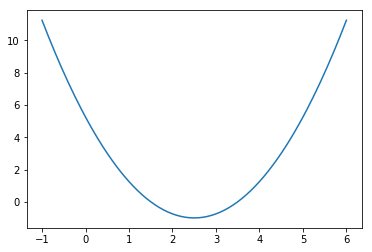

In [4]:
plt.plot(plot_x, plot_y)

In [5]:
def dJ(theta):
    return 2*(theta - 2.5)

In [6]:
def J(theta):
    return (theta - 2.5)**2 - 1

In [7]:
# 学习率eta， theta初始值， 当J的变换很小的时候（<epsilon）停止
eta = 0.1
theta = 0.0
epsilon = 1e-8

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


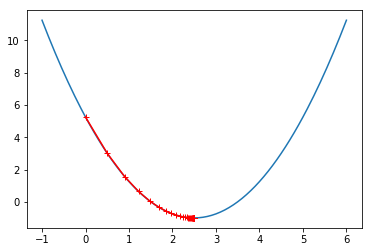

In [8]:
eta = 0.1
theta = 0.0
epsilon = 1e-8
theta_history = [theta]

while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')

In [9]:
len(theta_history)

46

## 学习率对收敛的影响

In [10]:
# 封装梯度下降代码
def gradient_descent(initial_theta, eta, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)

    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history), J(np.array(theta_history)), color='r', marker='+')

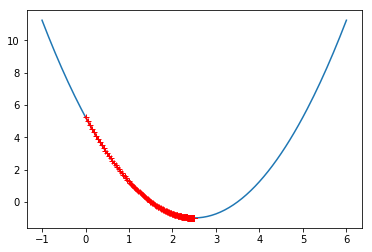

In [11]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [12]:
len(theta_history)

424

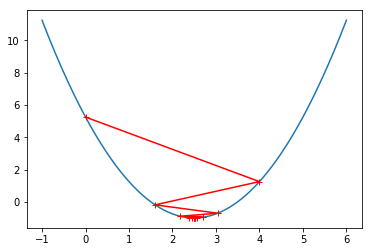

In [13]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [14]:
len(theta_history)

22

In [15]:
# 修改梯度下降代码，使其适应不收敛情况
def gradient_descent(initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iters = 0
    
    while i_iters < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if(abs(J(theta) - J(last_theta)) < epsilon):
            break
            
        i_iters += 1

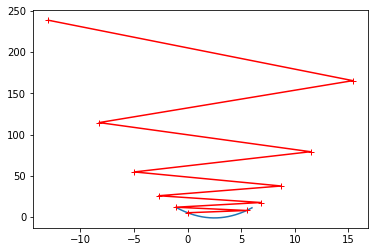

In [16]:
eta = 1.1
theta_history = []
gradient_descent(0, eta, n_iters=10)
plot_theta_history()

## 多元线性回归中梯度下降法

 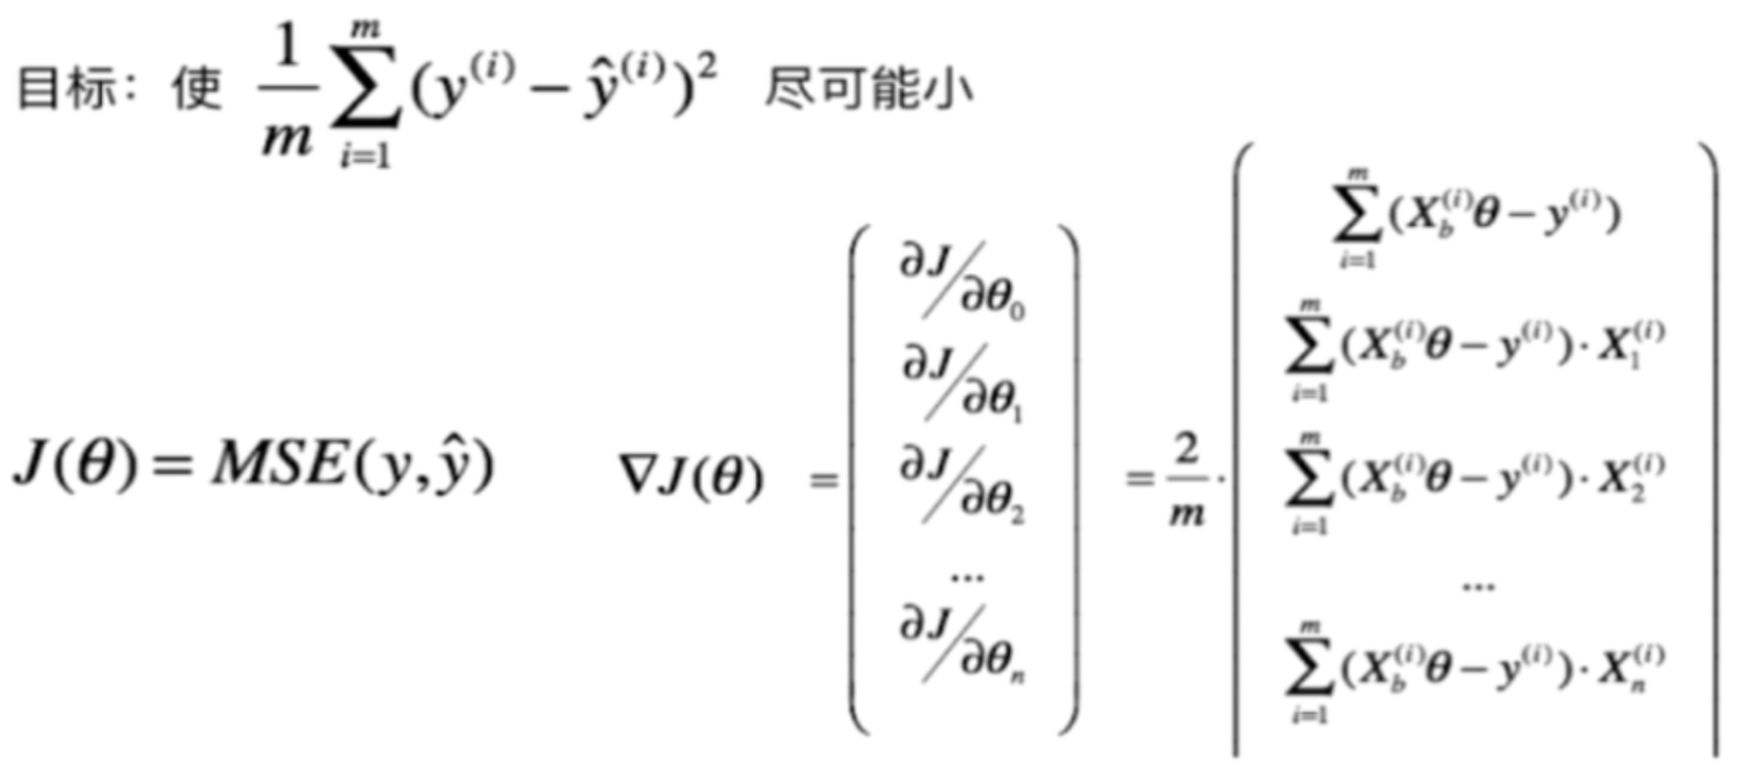

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [34]:
X = x.reshape(-1, 1)
X.shape

(100, 1)

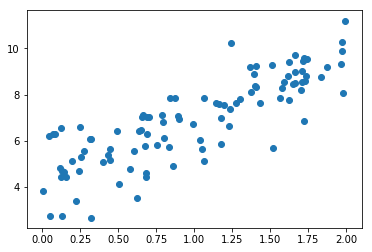

In [35]:
plt.scatter(x, y)

In [36]:
from algorithm.LinearRegression import LinearRegression

In [38]:
lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [39]:
lin_reg.coef_

array([2.61849882])

In [40]:
lin_reg.intercept_

4.326526468733661

### 向量化处理

In [41]:
from sklearn import datasets

In [42]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50]
y = y[y < 50]

In [43]:
from algorithm.model_selection import train_test_split
from algorithm.LinearRegression import LinearRegression

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 13), (98, 13), (392,), (98,))

#### 使用正规化方程训练模型

In [47]:
lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

CPU times: user 10.2 ms, sys: 3.42 ms, total: 13.6 ms
Wall time: 6.5 ms


0.8129794056212895

#### 使用梯度下降法
     多维数据梯度下降前，要进行数据归一化

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
X_train_standard = standardScaler.transform(X_train)

In [51]:
lin_reg2 = LinearRegression()
%time lin_reg2.fit_gd(X_train_standard, y_train)

CPU times: user 743 ms, sys: 20.6 ms, total: 764 ms
Wall time: 193 ms


LinearRegression()

In [53]:
X_test_standard = standardScaler.transform(X_test)

In [54]:
lin_reg2.score(X_test_standard, y_test)

0.8129873310487505

#### 随机梯度下降法
     在样本个数很大的情况下，每次选取其中一个样本计算梯度而不是计算全部样本梯度，以精度换取效率(其实精度依然很高）

In [55]:
# 创建一个样本数很大，特征数为1的训练集
m = 100000

x = np.random.normal(size=m)
X = x.reshape(-1, 1)
y = 4.*x + 3. + np.random.normal(0, 3, size=m)

In [56]:
from algorithm.LinearRegression import LinearRegression

lin_reg3 = LinearRegression()
lin_reg3.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [59]:
lin_reg3.coef_

array([3.99893829])

In [58]:
lin_reg3.intercept_

3.014188401321709

In [78]:
# 使用波士顿房价真实数据(上步已经进行了归一化)

lin_reg4 = LinearRegression()
%time lin_reg4.fit_sgd(X_train_standard, y_train, n_iters=2)
lin_reg4.score(X_test_standard, y_test)

CPU times: user 7.2 ms, sys: 2.93 ms, total: 10.1 ms
Wall time: 7.38 ms


0.7289935589579877

In [84]:
# 循环轮数n_iters越多，训练精度越高
lin_reg4 = LinearRegression()
%time lin_reg4.fit_sgd(X_train_standard, y_train, n_iters=20)
lin_reg4.score(X_test_standard, y_test)

CPU times: user 47.8 ms, sys: 2.53 ms, total: 50.3 ms
Wall time: 48.5 ms


0.8124012396718843

### scikit-learn中的SGD

In [85]:
 from sklearn.linear_model import SGDRegressor

In [89]:
sgd_reg = SGDRegressor(n_iter=20)
%time sgd_reg.fit(X_train_standard, y_train)
sgd_reg.score(X_test_standard, y_test)

CPU times: user 1.54 ms, sys: 561 µs, total: 2.1 ms
Wall time: 1.21 ms


0.8104552774386697